In [1]:
!pip install medmnist


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import urllib.request
import PIL
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, losses


2022-05-16 04:06:37.185677: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-16 04:06:37.185708: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:

## Open the image
imgURL = "https://raw.githubusercontent.com/larvalabs/cryptopunks/master/punks.png"
urllib.request.urlretrieve(imgURL, "cryptoPunksAll.jpg")
img = PIL.Image.open("cryptoPunksAll.jpg").convert("RGB")
imgArray = np.asarray(img)

n = 10000

finalArray = np.empty((n, 24, 24, 3))
for i in range(100):
  for j in range(100):
    a, b = 24 * i, 24 * (i + 1)  
    c, d = 24 * j, 24 * (j + 1) 
    idx = j + i * (100)
    finalArray[idx,:,:,:] = imgArray[a:b,c:d,:]
    


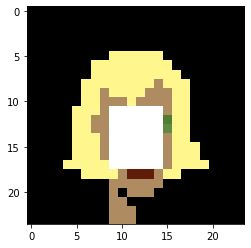

In [4]:
temp  =  finalArray[0,:,:,:].copy()

d2min, d2max = 9,14 
d1min, d1max = 11,17

temp[d1min : (d1max + 1), d2min : (d2max + 1)] = 255

plt.imshow(temp.astype('uint8'))


In [5]:
cancerpunks = finalArray.copy()
label = np.zeros(n)

## Loop over the cryptopunks
for i in range(10000):
  flip = np.random.randint(0, 2)
  if flip is 1:
    label[i] = 1
    d1loc = np.random.randint(d1min, d1max + 1)
    d2loc = np.random.randint(d2min, d2max + 1)
    cancerpunks[i,d1loc,d2loc,:] = 255


<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_1872205/2969927026.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if flip is 1:


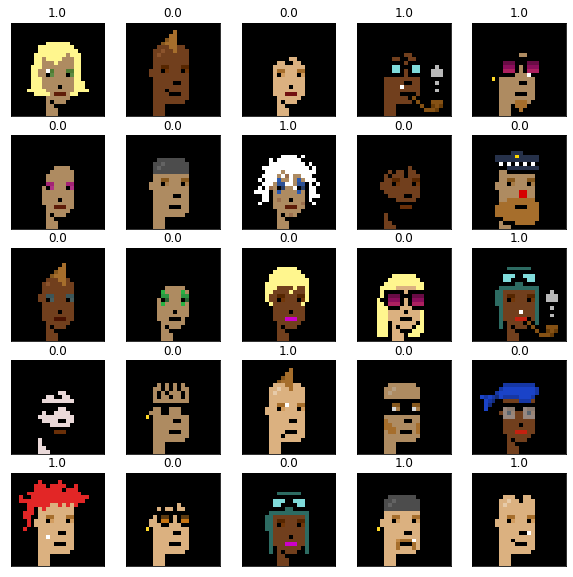

In [6]:
## plot some examples
plt.figure(figsize=(10,10))
for i in range(25): 
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(cancerpunks[i,:,:,:].astype('uint8'))
  plt.title(label[i])

In [7]:
print(label)
print(label.shape)

[1. 0. 0. ... 1. 1. 0.]
(10000,)


In [8]:
cancerpunks = cancerpunks.transpose((0, 3, 1, 2))

In [9]:
import urllib.request
import PIL
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
baseUrl = "https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/"
for i in range(0,10000, 1000):
  url = baseUrl+str(i)+"-"+str(i + 999)+".csv"
  print(url)
  if (i == 0):
    dat = pd.read_csv(url)
  else :
    dat = pd.concat ([dat, pd.read_csv(url)], 
                      join = 'inner',
                     ignore_index = True)

https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/0-999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/1000-1999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/2000-2999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/3000-3999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/4000-4999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/5000-5999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/6000-6999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/7000-7999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/8000-8999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/9000-9999.csv


In [11]:
dat.head()


,id,type,gender,skin tone,count,accessories
0,0,Human,Female,Medium,3,Green Eye Shadow / Earring / Blonde Bob
1,1,Human,Male,Dark,2,Smile / Mohawk
2,2,Human,Female,Light,1,Wild Hair
3,3,Human,Male,Dark,3,Wild Hair / Nerd Glasses / Pipe
4,4,Human,Male,Medium,4,Big Shades / Wild Hair / Earring / Goat


In [12]:
dat.shape

(10000, 6)

In [13]:
dat.insert(6, 'cancer',  label, allow_duplicates=False)

In [14]:
dat.head()


,id,type,gender,skin tone,count,accessories,cancer
0,0,Human,Female,Medium,3,Green Eye Shadow / Earring / Blonde Bob,1.0
1,1,Human,Male,Dark,2,Smile / Mohawk,0.0
2,2,Human,Female,Light,1,Wild Hair,0.0
3,3,Human,Male,Dark,3,Wild Hair / Nerd Glasses / Pipe,1.0
4,4,Human,Male,Medium,4,Big Shades / Wild Hair / Earring / Goat,1.0


In [15]:
dat.shape

(10000, 7)

In [16]:
!pip install fast_ml

Defaulting to user installation because normal site-packages is not writeable


In [17]:
from fast_ml.model_development import train_valid_test_split
from sklearn.model_selection import train_test_split

In [18]:
n = cancerpunks.shape[0]
trainFraction = 0.8
sample = np.random.uniform(size = n) < trainFraction

x = cancerpunks/ 255

y = dat.cancer.to_numpy()

y= y.reshape(y.shape[0], 1)
## Need to have the extra dimension

x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=0.8)
test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5)
[x_train.shape, x_test.shape,x_valid.shape]

[(8000, 3, 24, 24), (1000, 3, 24, 24), (1000, 3, 24, 24)]

In [19]:
[y_train.shape, y_test.shape,y_valid.shape]

[(8000, 1), (1000, 1), (1000, 1)]

In [20]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torchvision
import torchvision.transforms as transforms

trainDataset = TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train))
trainloader = torch.utils.data.DataLoader(trainDataset, batch_size = 100, shuffle = False, num_workers = 1)

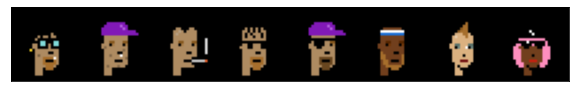

tensor([1., 1., 0., 0., 0., 0., 1., 1.])

In [21]:
dataiter = iter(trainloader)
images, labels = dataiter.next()


def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


# show images

plt.figure(figsize = (10, 10))
imshow(torchvision.utils.make_grid(images[11 : 19, :, :, :]))

# print labels
labels[11 : 19,0]

In [22]:
for i, data in enumerate(trainloader, 0):
  # get the inputs; data is a list of [inputs, labels]
  inputs, labels = data
[inputs.shape, labels.shape]

[torch.Size([100, 3, 24, 24]), torch.Size([100, 1])]

In [23]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        ## This has to be changed because the size
        ## of our inputs is different than the CFAR
        ## example. There's is 32x32 and ours is 24x24
        ## Also, I changed the rest of the network architecture
        ## here
        ## Finally, we only have one output.
        self.fc1 = nn.Linear(16 * 3 * 3, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x
net = Net()

In [24]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=144, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)


In [25]:
net(inputs).shape

torch.Size([100, 1])

In [26]:
import torch.optim as optim
#criterion = nn.CrossEntropyLoss()
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [27]:
for epoch in range(100):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
#        if i % 2000 == 1999:    # print every 2000 mini-batches
#            print('[%d, %5d] loss: %.3f' %
#                  (epoch + 1, i + 1, running_loss / 2000))
#            running_loss = 0.0

print('Finished Training')

Finished Training


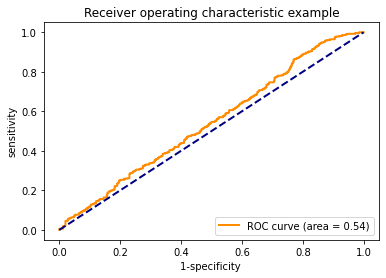

In [28]:
## Run the testing data through the NN
testout = net(torch.Tensor(x_test)).detach().numpy()

## Compare with the testing labels
from sklearn.metrics import accuracy_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, testout)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('1-specificity ')
plt.ylabel('sensitivity')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

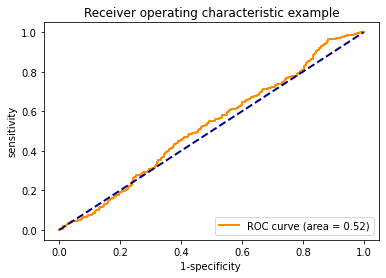

In [29]:
## Run the valid data through the NN
testout = net(torch.Tensor(x_valid)).detach().numpy()

## Compare with the valid labels
from sklearn.metrics import accuracy_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid, testout)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('1-specificity ')
plt.ylabel('sensitivity')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [30]:
from scipy.optimize import brentq
from sklearn.metrics import roc_curve
from scipy.interpolate import interp1d

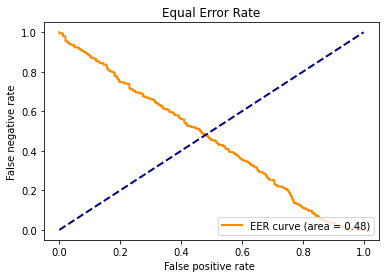

In [31]:
##Q2
testout = net(torch.Tensor(x_test)).detach().numpy()
from sklearn.metrics import accuracy_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, testout)
eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
thresh = interp1d(fpr, thresholds)(eer)

plt.figure()
## TPR + FNR = 1
lw = 2
plt.plot(fpr, 1-tpr, color='darkorange',
         lw=lw, label='EER curve (area = %0.2f)' % eer)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate ')
plt.ylabel('False negative rate')
plt.title('Equal Error Rate')
plt.legend(loc="lower right")
plt.show()

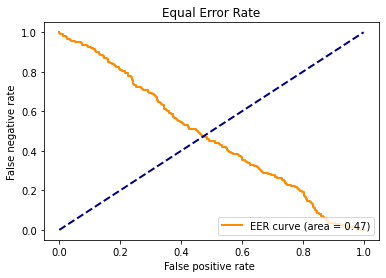

In [32]:

testout = net(torch.Tensor(x_valid)).detach().numpy()
from sklearn.metrics import accuracy_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid, testout)
eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
thresh = interp1d(fpr, thresholds)(eer)

plt.figure()
lw = 2
## TPR + FNR = 1
plt.plot(fpr, 1-tpr, color='darkorange',
         lw=lw, label='EER curve (area = %0.2f)' % eer)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate ')
plt.ylabel('False negative rate')
plt.title('Equal Error Rate')
plt.legend(loc="lower right")
plt.show()


Is there a reason why it seems like it's so wrong for these cases?
1. Probably because the probability of the disease is exactly 50%


In [33]:
##Q3


In [60]:
## j=imgArray[x:x+24,y:y+24,:]

def probability_disease(x,y):
    a, b = 24 * x, 24 * (x + 1)  
    c, d = 24 * y, 24 * (y + 1)
    idx = y + x * (100)
    cancerpunks[idx,0,:,:]=imgArray[a:b,c:d,0]
    cancerpunks[idx,1,:,:]=imgArray[a:b,c:d,1]
    cancerpunks[idx,2,:,:]=imgArray[a:b,c:d,2]
    pro_x = net(torch.Tensor(cancerpunks)).detach().numpy().mean()
  
    print(pro_x)


In [61]:
probability_disease(1,2)

0.45789853
